

# Linear Regression: Clearly Explained

This Jupyter Notebook is based on the video ["Linear Regression, Clearly Explained!!!"](https://www.youtube.com/watch?v=7ArmBVF2dCs).
It thoroughly covers the core concepts of linear regression, augmented with additional explanations, visualizations, and references to make the material engaging and educational.

### Objectives:
- Understand the fundamentals of linear regression.
- Learn about least squares, residuals, \( R^2 \), and \( p \)-values.
- Visualize data and results to reinforce learning.
- Explore the mathematical basis of linear regression.

---

### Outline:
1. What is Linear Regression?
2. The Method of Least Squares
3. Residuals and Sum of Squares
4. \( R^2 \): Coefficient of Determination
5. Statistical Significance: \( p \)-values and \( F \)-tests
6. Applications and Examples


---

### Did You Know?
Linear regression is not just about fitting a line! It's about interpreting relationships, making predictions, and understanding the strength of association. 

Explore how changing \( X \) impacts \( Y \) in the next visualization!




## What is Linear Regression?

Linear regression is a statistical method used to model the relationship between one dependent variable (\( Y \)) and one or more independent variables (\( X \)). 
In the simplest case, with one independent variable, the relationship is modeled by the equation of a line:

$$ Y = eta_0 + eta_1 X + \epsilon $$

Where:
- \( eta_0 \): Intercept (value of \( Y \) when \( X = 0 \)).
- \( eta_1 \): Slope (rate of change of \( Y \) with \( X \)).
- \( \epsilon \): Random error term.

Linear regression aims to find the best-fit line that minimizes the error term using the method of least squares.


---

### Did You Know?
Linear regression is not just about fitting a line! It's about interpreting relationships, making predictions, and understanding the strength of association. 

Explore how changing \( X \) impacts \( Y \) in the next visualization!




# Visualization: Scatter Plot of Data
# Below, you can generate a scatter plot to visualize the relationship between \( X \) and \( Y \).
# Use libraries like matplotlib to create the plot.


---

### Did You Know?
Linear regression is not just about fitting a line! It's about interpreting relationships, making predictions, and understanding the strength of association. 

Explore how changing \( X \) impacts \( Y \) in the next visualization!


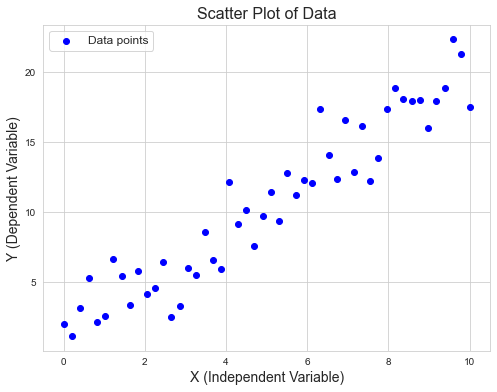

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 50)
Y = 2 * X + 1 + np.random.normal(0, 2, size=X.shape)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color="blue", label="Data points")
plt.title("Scatter Plot of Data", fontsize=16)
plt.xlabel("X (Independent Variable)", fontsize=14)
plt.ylabel("Y (Dependent Variable)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



# Visualization: Analyze the Data
# Create plots or graphs to interpret the output of the above code cell.


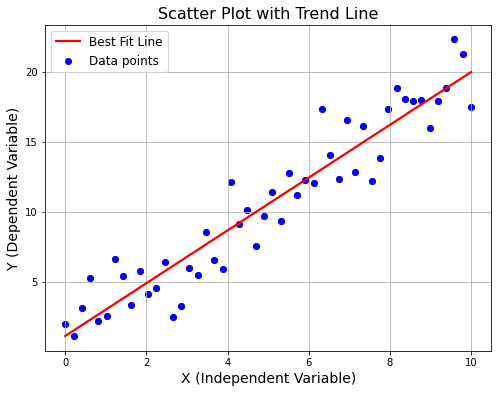

In [2]:

# Adding a trend line to the scatter plot
import seaborn as sns

# Creating a regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=X, y=Y, ci=None, color="red", line_kws={"label": "Best Fit Line"})
plt.scatter(X, Y, color="blue", label="Data points")
plt.title("Scatter Plot with Trend Line", fontsize=16)
plt.xlabel("X (Independent Variable)", fontsize=14)
plt.ylabel("Y (Dependent Variable)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
